# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
#Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


## Create data to view and fit


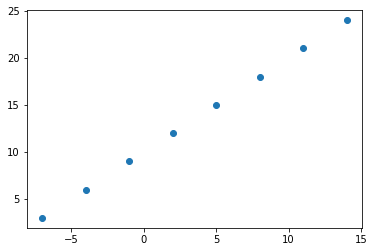

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#Create features
X = np.array([-7.0, -4.0, -1.0, 2, 5, 8, 11 ,14.0])
#Create labels
y = np.array([3.0, 6.0, 9, 12, 15 ,18 ,21,24 ])

#Visualize
plt.scatter(X,y);

In [ ]:
y ==  X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shape

In [ ]:
# Create a demo tensor for our housing price prediction problem

house_infor = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_infor, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
# Turn our Numpy into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself  or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 



In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 532ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
model.predict([17.0])

array([[12.716021]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [ ]:

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.002),
              metrics=["mae"])

#3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 572ms/step - loss: 14.3099 - mae: 14.3099
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 13.6956 - mae: 13.6956
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 13.1177 - mae: 13.1177
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 12.6180 - mae: 12.6180
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 12.2064 - mae: 12.2064
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 11.7614 - mae: 11.7614
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 11.3047 - mae: 11.3047
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 10.8328 - mae: 10.8328
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 10.3265 - mae: 10.3265
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 9.8564 - mae: 9.8564
Epoch 11/1000
1/1 [==============================] - 0s

In [ ]:
model.predict([17.0])

array([[27.124018]], dtype=float32)

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [ ]:
# Make a bigger dataset
X = tf.range(-100,100,4)
y = X + 10


## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [ ]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

###  Visualing the data

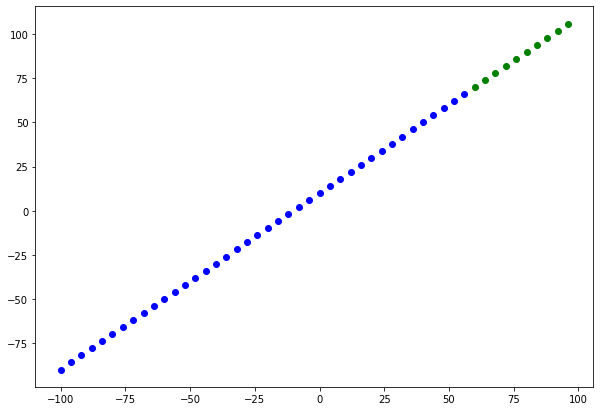

In [ ]:
plt.figure(figsize=(10,7))

plt.scatter(X_train, y_train, c="b", label="Training data");

plt.scatter(X_test, y_test, c="g", label="Testing data")

plt.show()

In [ ]:
#Let's have

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1], activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.002),
              metrics=["mae"])

#3. Fit the model

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=300)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/300
2/2 [==============================] - 3s 23ms/step - loss: 40.9219 - mae: 40.9219
Epoch 2/300
2/2 [==============================] - 0s 6ms/step - loss: 32.8169 - mae: 32.8169
Epoch 3/300
2/2 [==============================] - 0s 12ms/step - loss: 26.4695 - mae: 26.4695
Epoch 4/300
2/2 [==============================] - 0s 6ms/step - loss: 19.3126 - mae: 19.3126
Epoch 5/300
2/2 [==============================] - 0s 23ms/step - loss: 11.4095 - mae: 11.4095
Epoch 6/300
2/2 [==============================] - 0s 8ms/step - loss: 4.5439 - mae: 4.5439
Epoch 7/300
2/2 [==============================] - 0s 10ms/step - loss: 9.6891 - mae: 9.6891
Epoch 8/300
2/2 [==============================] - 0s 13ms/step - loss: 10.2559 - mae: 10.2559
Epoch 9/300
2/2 [==============================] - 0s 10ms/step - loss: 8.0901 - mae: 8.0901
Epoch 10/300
2/2 [==============================] - 0s 13ms/step - loss: 8.1696 - mae: 8.1696
Epoch 11/300
2/2 [==============================] - 0s 23ms/

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=model.predict(X_test)):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

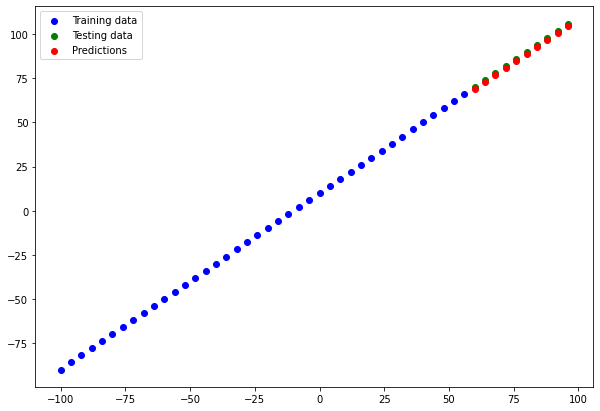

In [ ]:
plot_predictions()

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 527ms/step - loss: 1.2502 - mae: 1.2502


[1.2501541376113892, 1.2501541376113892]

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
#Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                y_pred = tf.squeeze(tf.constant(model.predict(X_test))))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.2501533>

In [ ]:
#Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                y_pred = tf.squeeze(tf.constant(model.predict(X_test))))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1.5871074>

array([[ 68.99532 ],
       [ 72.94039 ],
       [ 76.8844  ],
       [ 80.829636],
       [ 84.77592 ],
       [ 88.7222  ],
       [ 92.668465],
       [ 96.61466 ],
       [100.560715],
       [104.50676 ]], dtype=float32)

# A larger example


In [12]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [14]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [16]:
insurance = pd.get_dummies(insurance)

In [17]:
insurance

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [19]:
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2 , random_state= 42)

In [38]:
tf.random.set_seed(42)


insuarance_model = tf.keras.Sequential()
insuarance_model.add(tf.keras.layers.Dense(10))
insuarance_model.add(tf.keras.layers.Dense(1))

insuarance_model.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005),
                         metrics = ["mae"])

In [39]:
history = insuarance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13317.5098 - mae: 13317.5098
Epoch 2/100
34/34 [==============================] - 0s 6ms/step - loss: 13227.0234 - mae: 13227.0234
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.7500 - mae: 13066.7500
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12806.7334 - mae: 12806.7334
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 12427.5850 - mae: 12427.5850
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11920.1543 - mae: 11920.1543
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 11300.8848 - mae: 11300.8848
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 10613.2500 - mae: 10613.2500
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 9923.3096 - mae: 9923.3096
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9265.3926 

In [47]:
tf.random.set_seed(42)


insuarance_model = tf.keras.Sequential()
insuarance_model.add(tf.keras.layers.Dense(100))
insuarance_model.add(tf.keras.layers.Dense(10))
insuarance_model.add(tf.keras.layers.Dense(1))

insuarance_model.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(learning_rate= 0.005),
                         metrics = ["mae"])

In [48]:
history =  insuarance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 12806.5977 - mae: 12806.5977
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 9072.1924 - mae: 9072.1924
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 7479.6968 - mae: 7479.6968
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7323.7925 - mae: 7323.7925
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7228.9292 - mae: 7228.9292
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7127.3120 - mae: 7127.3120
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7008.0400 - mae: 7008.0400
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6867.5684 - mae: 6867.5684
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6711.1689 - mae: 6711.1689
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6563.9194 - mae: 6563.91

Text(0.5, 0, 'epochs')

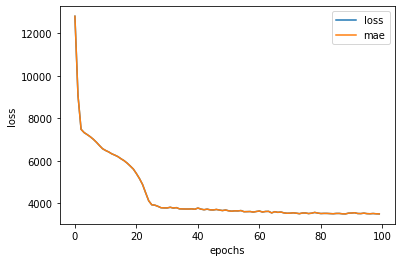

In [49]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


# Early Stopping Callback


## Normalization data

In [50]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"] ),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker", "region"])
)

X = insurance.drop('charges', axis = 1)
y = insurance['charges']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [52]:
X_train_model = ct.transform(X_train)
X_test_model = ct.transform(X_test)

In [55]:
tf.random.set_seed(42)
insuarance_models_4 = tf.keras.Sequential()
insuarance_models_4.add(tf.keras.layers.Dense(100))
insuarance_models_4.add(tf.keras.layers.Dense(10))
insuarance_models_4.add(tf.keras.layers.Dense(1))

insuarance_models_4.compile(loss = tf.keras.losses.mae,
                            optimizer = tf.keras.optimizers.Adam(lr = 0.01),
                            metrics = ["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [56]:
insuarance_models_4.fit(X_train_model, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13217.9932 - mae: 13217.9932
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 11378.8047 - mae: 11378.8047
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 8112.9468 - mae: 8112.9468
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7588.9121 - mae: 7588.9121
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7103.4785 - mae: 7103.4785
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6513.8735 - mae: 6513.8735
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 5593.9985 - mae: 5593.9985
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 4434.3403 - mae: 4434.3403
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3745.8254 - mae: 3745.8254
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3679.4282 - mae: 3679.